
# Assignment 3  <font color="blue"> (15 points) </font>
 
------
### Information
**Name:** Ahmed Ibrahim

**Student Number:** 261032796

**Date:** 2021-11-07

**Course Number:** YCBS 255 - Statistical Machine Learning

------

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

## Part A

In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Question A1: Generate x1 array.
x1 = np.linspace(-20, 20, 100)

In [4]:
# Question A1: Generate x2, x3, x4, x5 array.
x1 = np.linspace(-20, 20, 100)
x_list = [x1]
x_range = np.arange(2,6)
for value in x_range:
  x_value = np.power(x1, value)
  x_list.append(x_value)
x2 = x_list[1]
x3 = x_list[2]
x4 = x_list[3]
x5 = x_list[4]
X = pd.DataFrame(x_list, index = ['x1', 'x2', 'x3', 'x4', 'x5']).transpose().to_numpy()

In [5]:
# Question A2: Generate 'y' function.
np.random.seed(12)
mu = 0
sigma = math.sqrt(4)
eps = np.random.normal(mu, sigma, 100)
y = 1.75 + 5*x1 + 0.05*x3 -10.3*x5 + eps

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

Text(0.5, 1.0, '5th Degree Polynomial')

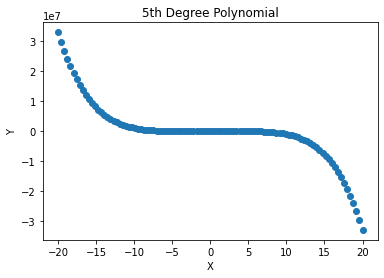

In [6]:
# Question A2: Plot polynomial.
plt.scatter(x1, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('5th Degree Polynomial')
plt.show()

In [7]:
# Question A3: Using  5-fold cross-validation, train a lasso model including with 10 different tunning parameters. 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
k = 5
kf_5 = KFold(n_splits = k, random_state = 12, shuffle = True)
tunning_para_list = [0.05, 0.1, 1, 5, 50, 500, 2500, 10000]
lasso_avg_mse_list = []
for tunning_para in tunning_para_list:
  lasso_regression = Lasso(alpha = tunning_para)
  lasso_mse_list = []
  for train_index, test_index in kf_5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso_regression.fit(X_train, y_train)
    y_pred = lasso_regression.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred)
    lasso_mse_list.append(mse_lasso)
    print(lasso_regression.coef_)
  lasso_avg_mse = sum(lasso_mse_list)/len(lasso_mse_list)
  lasso_avg_mse_list.append(lasso_avg_mse)
print(lasso_avg_mse_list)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 5.52965206e+01  4.98208024e-01 -4.88538558e-01 -1.22317619e-03
 -1.02988817e+01]


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 5.15683208e+01 -4.82412550e-01 -4.28439513e-01  1.21663709e-03
 -1.02990146e+01]


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 2.96203885e+01  8.37638578e-02 -1.92599005e-01 -2.17064447e-04
 -1.02995073e+01]


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 1.10147462e+01 -5.95538097e-02 -1.09897617e-02  1.66767381e-04
 -1.02998722e+01]


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 7.64616272e+00  2.50521491e-02  2.19426404e-02 -8.53688934e-05
 -1.02999395e+01]


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 5.52893154e+01  4.98144179e-01 -4.88472167e-01 -1.22301861e-03
 -1.02988819e+01]


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 5.15612336e+01 -4.82342046e-01 -4.28376807e-01  1.21645399e-03
 -1.02990148e+01]


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 2.96130535e+01  8.36931506e-02 -1.92535472e-01 -2.16872064e-04
 -1.02995074e+01]


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 1.10074677e+01 -5.94768225e-02 -1.09252920e-02  1.66557579e-04
 -1.02998724e+01]


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 7.63902198e+00  2.49810632e-02  2.20077769e-02 -8.51572211e-05
 -1.02999397e+01]


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 5.51596229e+01  4.96994974e-01 -4.87277125e-01 -1.22018204e-03
 -1.02988842e+01]


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 5.14336629e+01 -4.81072967e-01 -4.27248090e-01  1.21315815e-03
 -1.02990169e+01]


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 2.94810233e+01  8.24204193e-02 -1.91391885e-01 -2.13409168e-04
 -1.02995096e+01]


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 1.08764536e+01 -5.80910520e-02 -9.76483633e-03  1.62781136e-04
 -1.02998746e+01]


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 7.51052235e+00  2.37019271e-02  2.31798798e-02 -8.13484618e-05
 -1.02999420e+01]


Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 5.45832116e+01  4.91887395e-01 -4.81965828e-01 -1.20757509e-03
 -1.02988945e+01]


Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 5.08666823e+01 -4.75432618e-01 -4.22231572e-01  1.19850997e-03
 -1.02990265e+01]


Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 2.88942223e+01  7.67638363e-02 -1.86309274e-01 -1.98018518e-04
 -1.02995192e+01]


Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 1.02941686e+01 -5.19320721e-02 -4.60725571e-03  1.45996946e-04
 -1.02998847e+01]


Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 6.94010923e+00  1.80256502e-02  2.83818779e-02 -6.44491494e-05
 -1.02999524e+01]


Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 4.80985847e+01  4.34427133e-01 -4.22213734e-01 -1.06574683e-03
 -1.02990107e+01]


Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 4.44881499e+01 -4.11978694e-01 -3.65795740e-01  1.03371800e-03
 -1.02991348e+01]


Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 2.22927111e+01  1.31272779e-02 -1.29129897e-01 -2.48737077e-05
 -1.02996278e+01]


Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 3.80400984e+00 -0.00000000e+00  5.27268589e-02  4.12963853e-06
 -1.02999964e+01]


Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

[ 5.82960076e-01 -0.00000000e+00  8.62036248e-02 -3.03226333e-06
 -1.03000680e+01]


Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00  0.00000000e+00  7.12796055e-02 -2.13227240e-06
 -1.03000178e+01]


Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  6.98944916e-02 -1.49453110e-05
 -1.03000134e+01]


Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  7.34076146e-02  2.83522168e-05
 -1.03000231e+01]


Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  7.56009404e-02  1.00393144e-05
 -1.03000286e+01]


Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00  0.00000000e+00  7.66908938e-02 -4.12341791e-05
 -1.03000315e+01]


Lasso(alpha=2500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00  0.00000000e+00  6.74424506e-02 -2.23057623e-07
 -1.03000067e+01]


Lasso(alpha=2500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  6.50516960e-02 -1.69092178e-05
 -1.02999992e+01]


Lasso(alpha=2500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  6.94412978e-02  3.06184879e-05
 -1.03000112e+01]


Lasso(alpha=2500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  7.15750336e-02  1.03091208e-05
 -1.03000162e+01]


Lasso(alpha=2500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00  0.00000000e+00  7.22432276e-02 -4.72364492e-05
 -1.03000174e+01]


Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[  0.           0.           0.04980114   0.         -10.2999556 ]


Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  4.92929766e-02 -2.30369853e-05
 -1.02999529e+01]


Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  5.46757303e-02  3.89978135e-05
 -1.02999672e+01]


Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00 -0.00000000e+00  5.57813711e-02  1.17950179e-05
 -1.02999674e+01]


Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

[ 0.00000000e+00  0.00000000e+00  5.49104707e-02 -7.15353989e-05
 -1.02999624e+01]
[11741.103089756949, 11737.829722527178, 11679.058585324547, 11421.276878262433, 8901.542547099929, 422.1602563137802, 528.6667237771838, 1145.7521774348236]


Text(0.5, 0, 'Tunning Parameters')

Text(0, 0.5, 'Mean Squarred Error')

Text(0.5, 1.0, 'MSE for Different TP')

<function matplotlib.pyplot.show>

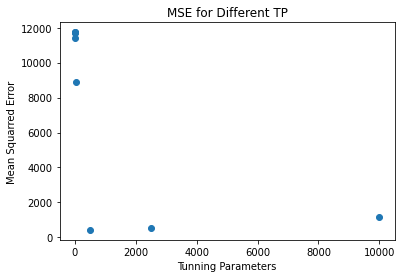

In [8]:
# Question A4: Plot mse vs tunning parameters.
plt.scatter(tunning_para_list, lasso_avg_mse_list)
plt.xlabel("Tunning Parameters")
plt.ylabel("Mean Squarred Error")
plt.title("MSE for Different TP")
plt.show

### Question A4: The choice of tunning parameter.

By looking at the computed MSE, assuming the best model is based on the one with the lowest MSE, the best tunning parameter among the list would be 500. The MSE was decreasing gradually as the tunning parameter neared 500 but for tunning parameters greated than 500, being 2500 and 10000; the MSE was in fact increasing. Variable selection did start at 500, where the second coefficient was eliminated for all 5 cross-validation versions but only 3 of those folds also had the first coefficient eliminated. However, for the tunning parameters of 2500 and 10000, the first and second coefficients were elimnated for all 5 folds respectively. 

## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


## Part B

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Question B1: Download Wage.csv.
from google.colab import files
uploaded = files.upload()
wage_data = pd.read_csv('Wage.csv')

Saving Wage.csv to Wage.csv


In [11]:
# Question B1: Do some data exploration on 'Wage.csv'.
wage_data.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [12]:
wage_data.shape

(3000, 13)

In [13]:
wage_data.dtypes

Unnamed: 0      int64
year            int64
age             int64
sex            object
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [14]:
# Question B1: Extract necessary columns.
data_x = wage_data['age']
data_y = wage_data['wage']

In [15]:
# Question B1: Do some data exploration on 'Wage.csv'.
wage_data.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [16]:
# Question B1: Perform polynomial regression using 5-fold cross validation to find optimal degree.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
degree_nth_list = np.arange(2, 19)
X = np.array(data_x).reshape(-1, 1)
y = np.array(data_y)
k = 5
kf_5 = KFold(n_splits = k, random_state = 5, shuffle = True)
score_list = []
for degree_nth in degree_nth_list:
  polynomial_model = PolynomialFeatures(degree = degree_nth)
  X_poly = polynomial_model.fit_transform(X)
  linear_model = LinearRegression()
  lr_model = linear_model.fit(X_poly, y)
  y_pred = lr_model.predict(X_poly)
  y_pred_array = np.array(y_pred).reshape(-1, 1)
  score = cross_val_score(linear_model, y_pred_array, y, cv = kf_5, scoring = 'neg_mean_squared_error').mean()
  score_list.append(abs(score))
print(score_list)

[1600.9284224082257, 1595.1496171774884, 1593.4731769525113, 1593.0080914486664, 1592.017475023536, 1591.2234256309891, 1591.2860932173166, 1591.3736372905585, 1591.3293440128434, 1591.3252011036634, 1591.7006803330821, 1598.921228391237, 1607.6767303405102, 1619.6644986222013, 1633.765569165246, 1648.5978741314757, 1662.8936676172405]


Text(0.5, 0, 'Number of Polynomial Degrees')

Text(0, 0.5, 'Mean Squarred Error')

Text(0.5, 1.0, 'MSE for Different Polynomial Degrees')

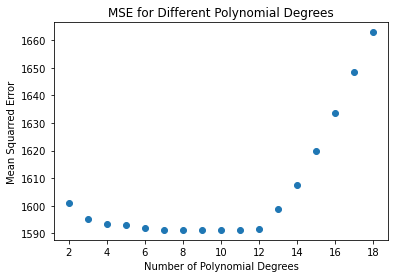

In [17]:
# Question B1: Plot MSE in function of polynomial degree.
plt.scatter(degree_nth_list, score_list)
plt.xlabel('Number of Polynomial Degrees')
plt.ylabel('Mean Squarred Error')
plt.title('MSE for Different Polynomial Degrees')

In [18]:
# Question B1: Compare the MSE of degree 7 with the rest.
def percentage_difference(value1, value2):
  Percentage = abs((value1 - value2)*100/value1)
  return str(Percentage) + " %"
MSE_7 = score_list[5]
percentage_difference_list = []
for MSE in score_list:
  percentage_difference_MSE = percentage_difference(MSE_7, MSE)
  percentage_difference_list.append(percentage_difference_MSE)
print(percentage_difference_list)

['0.6099078621462696 %', '0.24674043149800504 %', '0.1413850051025991 %', '0.11215683410200886 %', '0.049901816410979 %', '0.0 %', '0.003938327284407366 %', '0.009440010569839175 %', '0.006656411673444247 %', '0.006396051681674052 %', '0.02999294092868986 %', '0.4837663043576287 %', '1.034003424314633 %', '1.7873714359084474 %', '2.673549348821776 %', '3.605681488615283 %', '4.504096711486695 %']


### Question B1: Choose polynomial degree.
Using 5-fold cross-validation, polynomial models of degrees 2 to 18 were tested for predicting wage based on age. The polynomial of degree 7 had the lowest mean squarred error (MSE) of 1591.22. However, the highest MSE was 1662.89 being the polynomial of degree 18. The MSE was relative static from degree 6 to 12 and onwards started to increase with the increase of polynomial degree. It is worthnoting that all the models have MSE that deviate by less than 5 % relative to the lowest value of MSE. Thus, it is possible to select a model with fewer degrees as that would computational advantageous. The polynomial of degree 2 is only 0.61 % higher in MSE and degree 3 of 0.25 %. Among these two, since the difference in MSE is very small between these two model, the model with the lowest degree will be selected being of degree 2. 

In [19]:
# Question B1: Generate selected polynomial model.
polynomial_model = PolynomialFeatures(degree = 2)
X_poly_2 = polynomial_model.fit_transform(X)
linear_model = LinearRegression()
lr_model = linear_model.fit(X_poly_2, y)
y_pred = lr_model.predict(X_poly_2)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

Text(0.5, 1.0, 'Predicting Wage Based On Age Using Polynomial Regression')

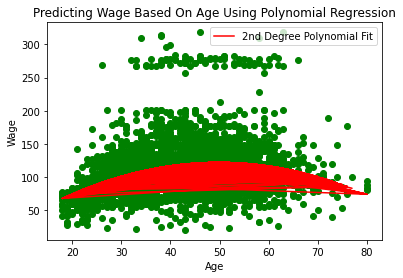

In [20]:
# Question B1: Make a plot of the resulting polynomial fit to the data.
plt.scatter(data_x, data_y, color = "green")
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Predicting Wage Based On Age Using Polynomial Regression')
plt.plot(X, y_pred,  color = "red", label = "2nd Degree Polynomial Fit")
plt.legend()
plt.show()

In [21]:
# Question B2: Prepare bins/steps for step function.
df_cut

NameError: ignored

In [ ]:
# Question B2: Fit a step function to predict wage using age with cv to find the optimal number of cuts , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
X = data_x
y = data_y
k = 5
kf_5 = KFold(n_splits = k, random_state = 12, shuffle = True)
cut_list = np.arange(1,16)
step_avg_mse_list = []
for cut_value in cut_list:
  step_mse_list = []
  for train_index, test_index in kf_5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    df_cut, bins = pd.cut(X_train, cut_value, retbins=True, right=True)
    df_steps = pd.concat([X_train, df_cut, y_train], keys = ['age','age_cuts','wage'], axis = 1)
    df_steps_dummies = pd.get_dummies(df_cut)
    step_fit = sm.GLM(df_steps.wage, df_steps_dummies).fit()
    #bin_mapping = np.digitize(X_test, bin) 
    #X_valid = pd.get_dummies(bin_mapping)
    #y_pred = step_fit.predict(X_valid)
    mse_step = mean_squared_error(y_test, y_pred)
    step_mse_list.append(mse_step)
  step_avg_mse = sum(step_mse_list)/len(step_mse_list)
  step_avg_mse_list.append(step_avg_mse)
  print(step_avg_mse_list)

In [ ]:
# Question B2: Plot the fit.


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


## Part C

### Question C: The dataset selection
The dataset selected is from a kaggle repository. The dataset contains the calculated body fat percentage for 252 men with their various body circumference measurements. The dataset will be used to create a predictive model using random forest and support vector machines to predict body fat percentage. The 15 features for the herein dataset are the following:    

*   Density determined from underwater weighing,
*   Percent body fat from Siri's (1956) equation,
*   Age (years),
*   Weight (lbs),
*   Height (inches),
*   Neck circumference (cm),
*   Chest circumference (cm),
*   Abdomen 2 circumference (cm),
*   Hip circumference (cm),
*   Thigh circumference (cm),
*   Knee circumference (cm),
*   Ankle circumference (cm),
*   Biceps (extended) circumference (cm),
*   Forearm circumference (cm),
*   Wrist circumference (cm).

For more information on the sources or details of the dataset, please visit the following link: https://www.kaggle.com/fedesoriano/body-fat-prediction-dataset?select=bodyfat.csv.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [24]:
# Question C: Dowload Dataset.
from google.colab import files
uploaded = files.upload()
body_fat_data = pd.read_csv('Bodyfat.csv')

Saving Bodyfat.csv to Bodyfat.csv


In [25]:
# Question C: Conduct some data exploration on dataset.
body_fat_data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [26]:
body_fat_data.dtypes

Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [27]:
body_fat_data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [28]:
body_fat_data.describe(include = 'all')

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


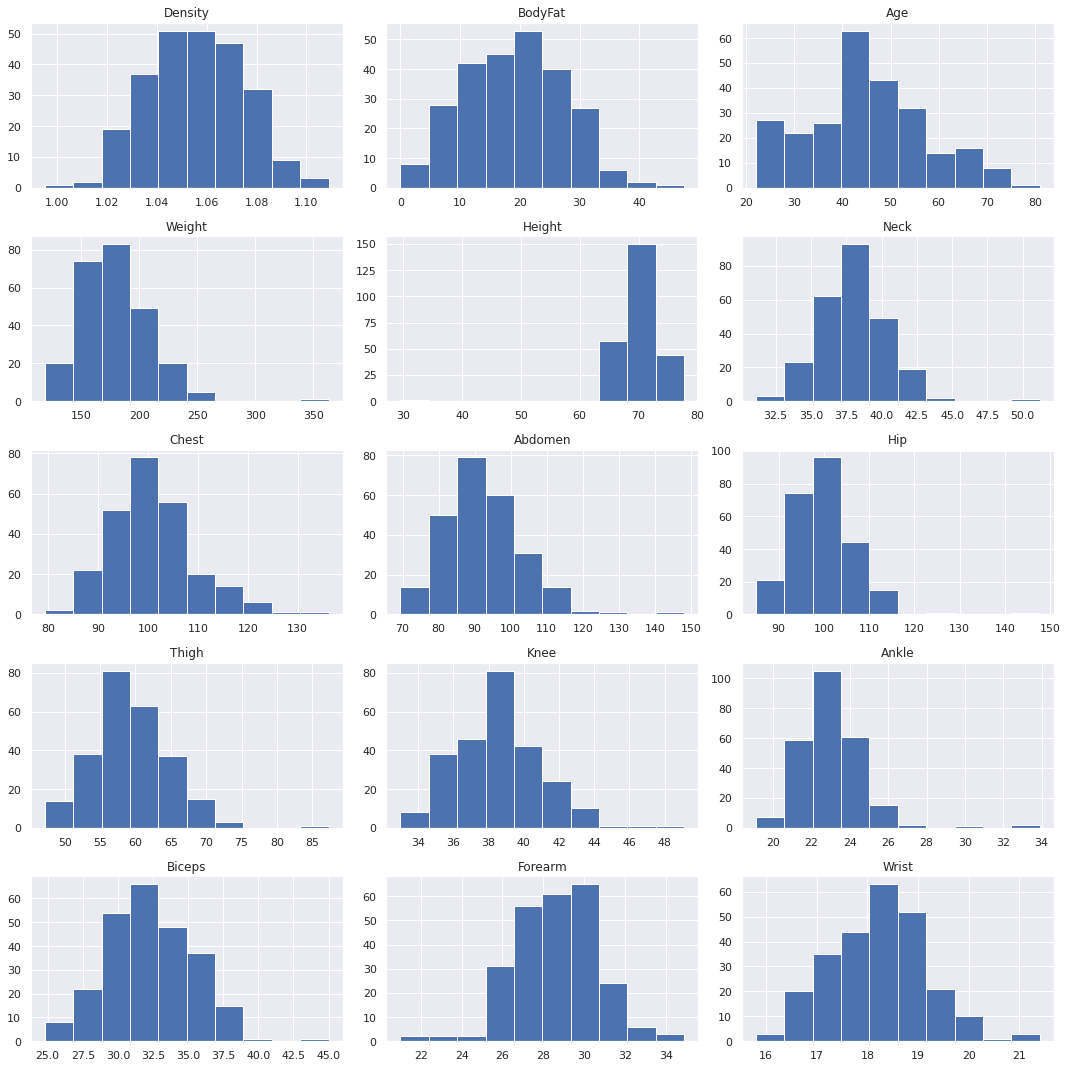

In [29]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8), (ax9, ax10, ax11), (ax12, ax13, ax14)) = plt.subplots(nrows = 5, ncols = 3, figsize = (15,15))
ax0.hist(body_fat_data['Density'])
ax0.set_title('Density')
ax1.hist(body_fat_data['BodyFat'])
ax1.set_title('BodyFat')
ax2.hist(body_fat_data['Age'])
ax2.set_title('Age')
ax3.hist(body_fat_data['Weight'])
ax3.set_title('Weight')
ax4.hist(body_fat_data['Height'])
ax4.set_title('Height')
ax5.hist(body_fat_data['Neck'])
ax5.set_title('Neck')
ax6.hist(body_fat_data['Chest'])
ax6.set_title('Chest')
ax7.hist(body_fat_data['Abdomen'])
ax7.set_title('Abdomen')
ax8.hist(body_fat_data['Hip'])
ax8.set_title('Hip')
ax9.hist(body_fat_data['Thigh'])
ax9.set_title('Thigh')
ax10.hist(body_fat_data['Knee'])
ax10.set_title('Knee')
ax11.hist(body_fat_data['Ankle'])
ax11.set_title('Ankle')
ax12.hist(body_fat_data['Biceps'])
ax12.set_title('Biceps')
ax13.hist(body_fat_data['Forearm'])
ax13.set_title('Forearm')
ax14.hist(body_fat_data['Wrist'])
ax14.set_title('Wrist')
fig.tight_layout()
plt.show();

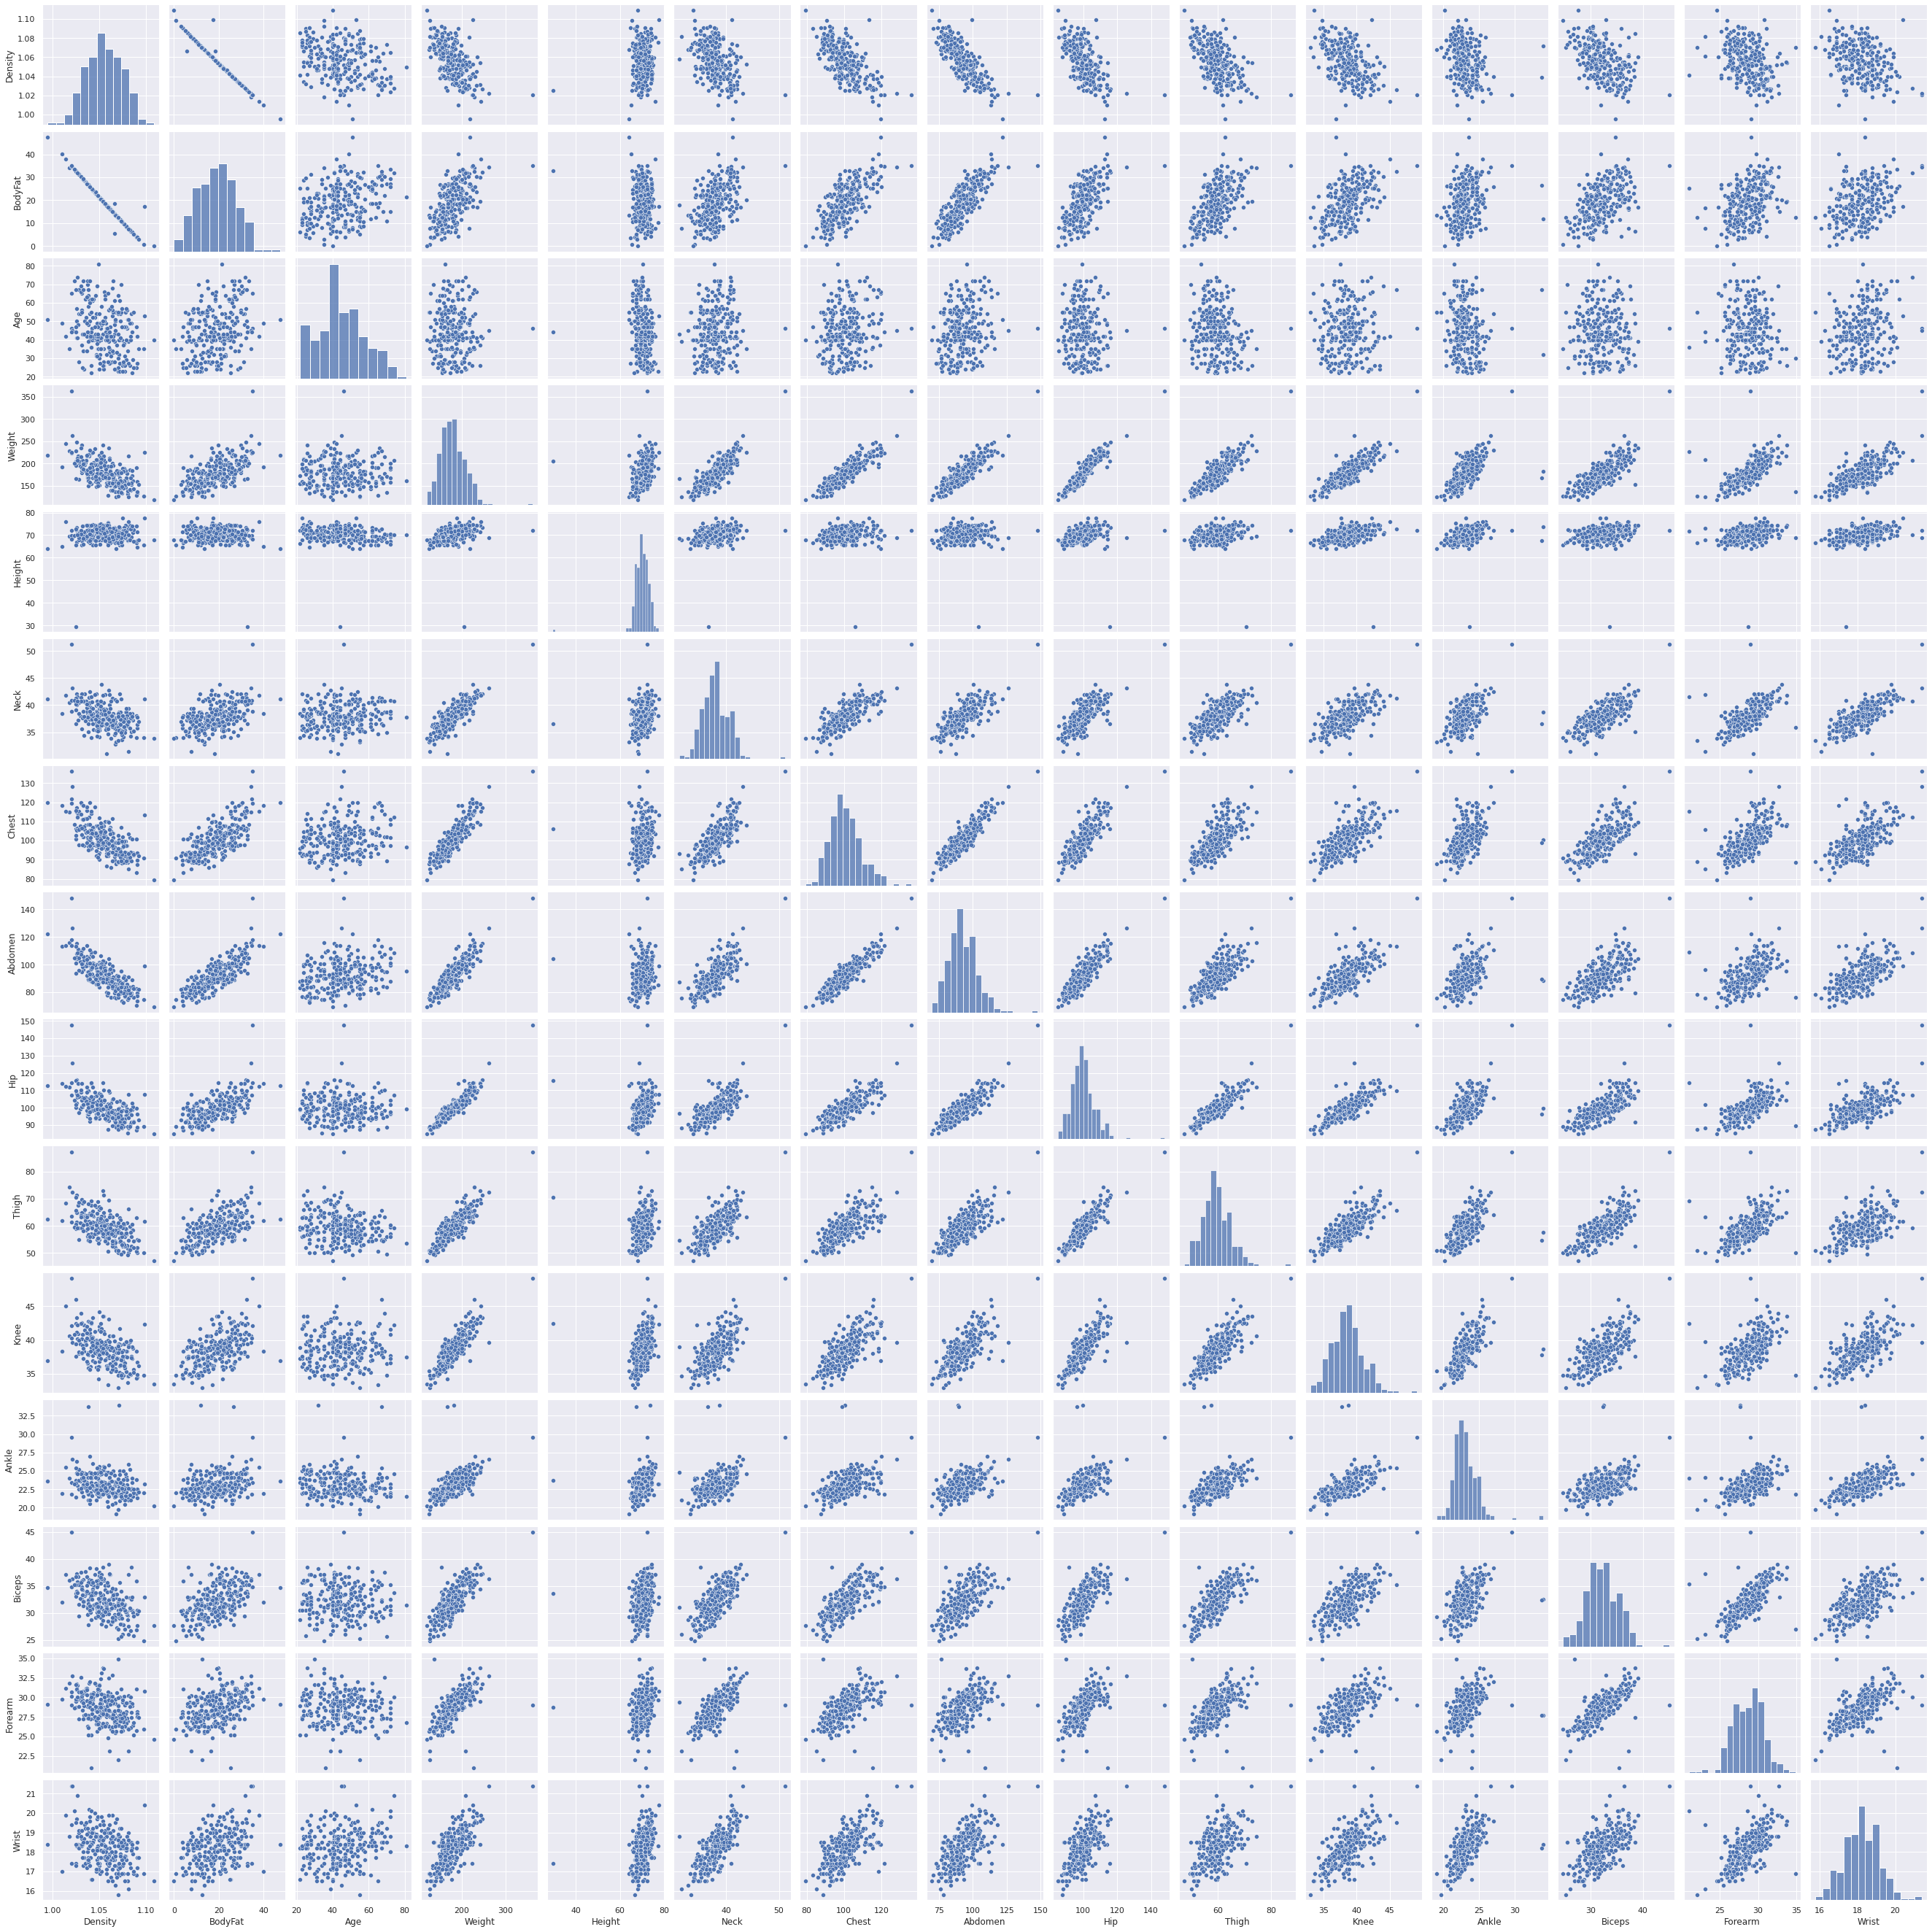

In [30]:
sns.pairplot(body_fat_data)

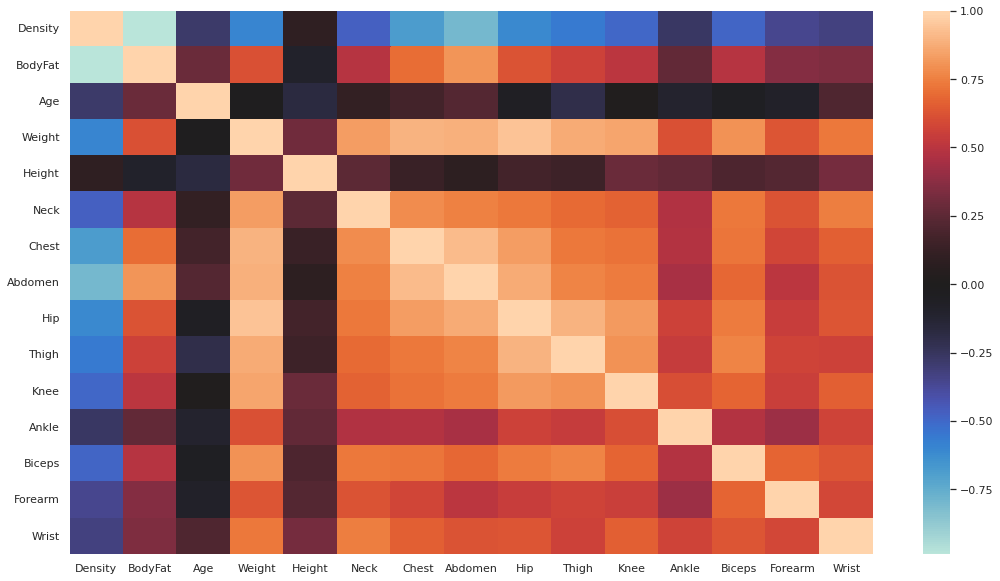

In [31]:
bfd_corr = body_fat_data.corr()
sns.set(rc = {'figure.figsize':(18,10)})
sns.heatmap(bfd_corr, center = 0)

In [32]:
body_fat_data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [33]:
duplicateRowsDF = body_fat_data[body_fat_data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :", duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are : Empty DataFrame
Columns: [Density, BodyFat, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist]
Index: []


### Question C: Obsrvations based on data exploration.
*   The dataset has 15 features, whom all are numerical.
*   The body fat percentage is calculated based on the density value. 
*   All the features are of type float, but only the ‘Age’ feature is of type integer. 
*   All columns have the same number of values, and the dataset is balanced.
*   Most of the body measurements have a standard deviation less than 10 %. 
*   The average body fat from these observations is 19.15 %. 
*   Based on bivariate analysis, the body measurement features are highly linearly correlated between each other. However, the ‘Age’ and ‘Height; features correlate poorly in a linear fashion.
*   There are no missing values in the dataset not duplicate observations. 


In [60]:
# Question C: Segregate the predictors and target variable.
X = body_fat_data[['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']]
y = body_fat_data[['BodyFat']]

In [61]:
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [62]:
y.head()

,BodyFat
0,12.3
1,6.1
2,25.3
3,10.4
4,28.7


In [63]:
# Question C: Split the dataset into training (70%) and test sets (30%).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [64]:
# Question C: Scale the predictor variable.
from sklearn.preprocessing import StandardScaler
X_train_scaler = StandardScaler().fit(X_train)
X_test_scaler = StandardScaler().fit(X_test)
X_train_scaled = X_train_scaler.transform(X_train)
X_test_scaled = X_test_scaler.transform(X_test)

In [65]:
# Question C: Build random forest regressor.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr_ = RandomForestRegressor()
dict_para = {'n_estimators': [20, 40, 80, 100], 'min_samples_split':[3, 5, 8], 'max_features':[3, 6, 9], 'max_leaf_nodes':[4, 6, 8]}
gscv = GridSearchCV(rfr_ ,dict_para)
gscv.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [66]:
gscv.best_params_

{'max_features': 9,
 'max_leaf_nodes': 8,
 'min_samples_split': 5,
 'n_estimators': 20}

In [67]:
results_rfr_ = pd.DataFrame(gscv.cv_results_)
results_rfr_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031278,0.003227,0.004893,0.002064,3,4,3,20,"{'max_features': 3, 'max_leaf_nodes': 4, 'min_...",0.550762,0.572479,0.350869,0.510715,0.376245,0.472214,0.091257,101
1,0.066319,0.006018,0.004765,0.000340,3,4,3,40,"{'max_features': 3, 'max_leaf_nodes': 4, 'min_...",0.535174,0.550635,0.379213,0.515531,0.389656,0.474042,0.074079,99
2,0.105365,0.003964,0.007215,0.000698,3,4,3,80,"{'max_features': 3, 'max_leaf_nodes': 4, 'min_...",0.488175,0.520248,0.422340,0.586710,0.379756,0.479446,0.072727,98
3,0.132133,0.005071,0.007992,0.000221,3,4,3,100,"{'max_features': 3, 'max_leaf_nodes': 4, 'min_...",0.488617,0.526425,0.394882,0.537419,0.395485,0.468566,0.062065,104
4,0.028608,0.001676,0.003161,0.000090,3,4,5,20,"{'max_features': 3, 'max_leaf_nodes': 4, 'min_...",0.489623,0.553900,0.375688,0.555910,0.342479,0.463520,0.089164,106


In [68]:
best_gs_est= gscv.best_estimator_
best_gs_est

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=9, max_leaf_nodes=8,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
y_pred = best_gs_est.predict(X_test_scaled)

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

25.72590837455769

In [75]:
# Question C: Build support vector regressor.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr_ = SVR()
dict_para = {'kernel' : ['linear', 'poly', 'rbf'], 'C' : [1, 2, 4, 9, 25, 36]}
gscv = GridSearchCV(svr_ ,dict_para)
gscv.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 4, 9, 25, 36],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
gscv.best_params_

{'C': 2, 'kernel': 'linear'}

In [77]:
results_svr_ = pd.DataFrame(gscv.cv_results_)
results_svr_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005488,0.002083,0.001856,0.000342,1,linear,"{'C': 1, 'kernel': 'linear'}",0.663546,0.619893,0.557632,0.628546,0.594257,0.612774,0.035386,2
1,0.003533,0.000238,0.001727,0.000073,1,poly,"{'C': 1, 'kernel': 'poly'}",0.424614,0.401154,0.268296,0.234807,0.278998,0.321574,0.076328,13
2,0.002905,0.000226,0.002225,0.000692,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.504247,0.529274,0.418971,0.488631,0.383691,0.464963,0.054699,12
3,0.007352,0.001606,0.001951,0.000436,2,linear,"{'C': 2, 'kernel': 'linear'}",0.658507,0.591200,0.560798,0.671479,0.600181,0.616433,0.041944,1
4,0.003826,0.000243,0.001646,0.000076,2,poly,"{'C': 2, 'kernel': 'poly'}",0.415863,0.389358,0.244510,-0.277330,0.317365,0.217953,0.254732,14


In [78]:
best_gs_est= gscv.best_estimator_
best_gs_est

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
y_pred = best_gs_est.predict(X_test_scaled)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22.3098424910409

### Question C: Evaluate Performance and choose best model.

Both models used a training and test split of respectfully 70 % and 30 %. The regressor versions of the random forest and support vector machine were used for the sake of tackling the herein predictive problem. The mean squarred error was used to quantify the performance of the models. The support vector regressor had the lower mean squarred error making it the more performing and better model.

## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  
